In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
Inspiration

Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?

In [71]:
raw_data = pd.read_excel('credit.xls', skiprows=1)
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [76]:
raw_data.drop(['ID'],axis = 1, inplace = True)
raw_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [77]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [78]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [84]:
cols = ['SEX','EDUCATION','MARRIAGE','AGE']
for col in cols:
    print(raw_data[[col, 'default payment next month']].groupby([col], as_index=False).mean())

   SEX  default payment next month
0    1                    0.241672
1    2                    0.207763
   EDUCATION  default payment next month
0          0                    0.000000
1          1                    0.192348
2          2                    0.237349
3          3                    0.251576
4          4                    0.056911
5          5                    0.064286
6          6                    0.156863
   MARRIAGE  default payment next month
0         0                    0.092593
1         1                    0.234717
2         2                    0.209283
3         3                    0.260062
    AGE  default payment next month
0    21                    0.208955
1    22                    0.301786
2    23                    0.265306
3    24                    0.266193
4    25                    0.254637
5    26                    0.201433
6    27                    0.211916
7    28                    0.202981
8    29                    0.195016
9    30

In [85]:
raw_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [86]:
import seaborn as sns

In [87]:
raw_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


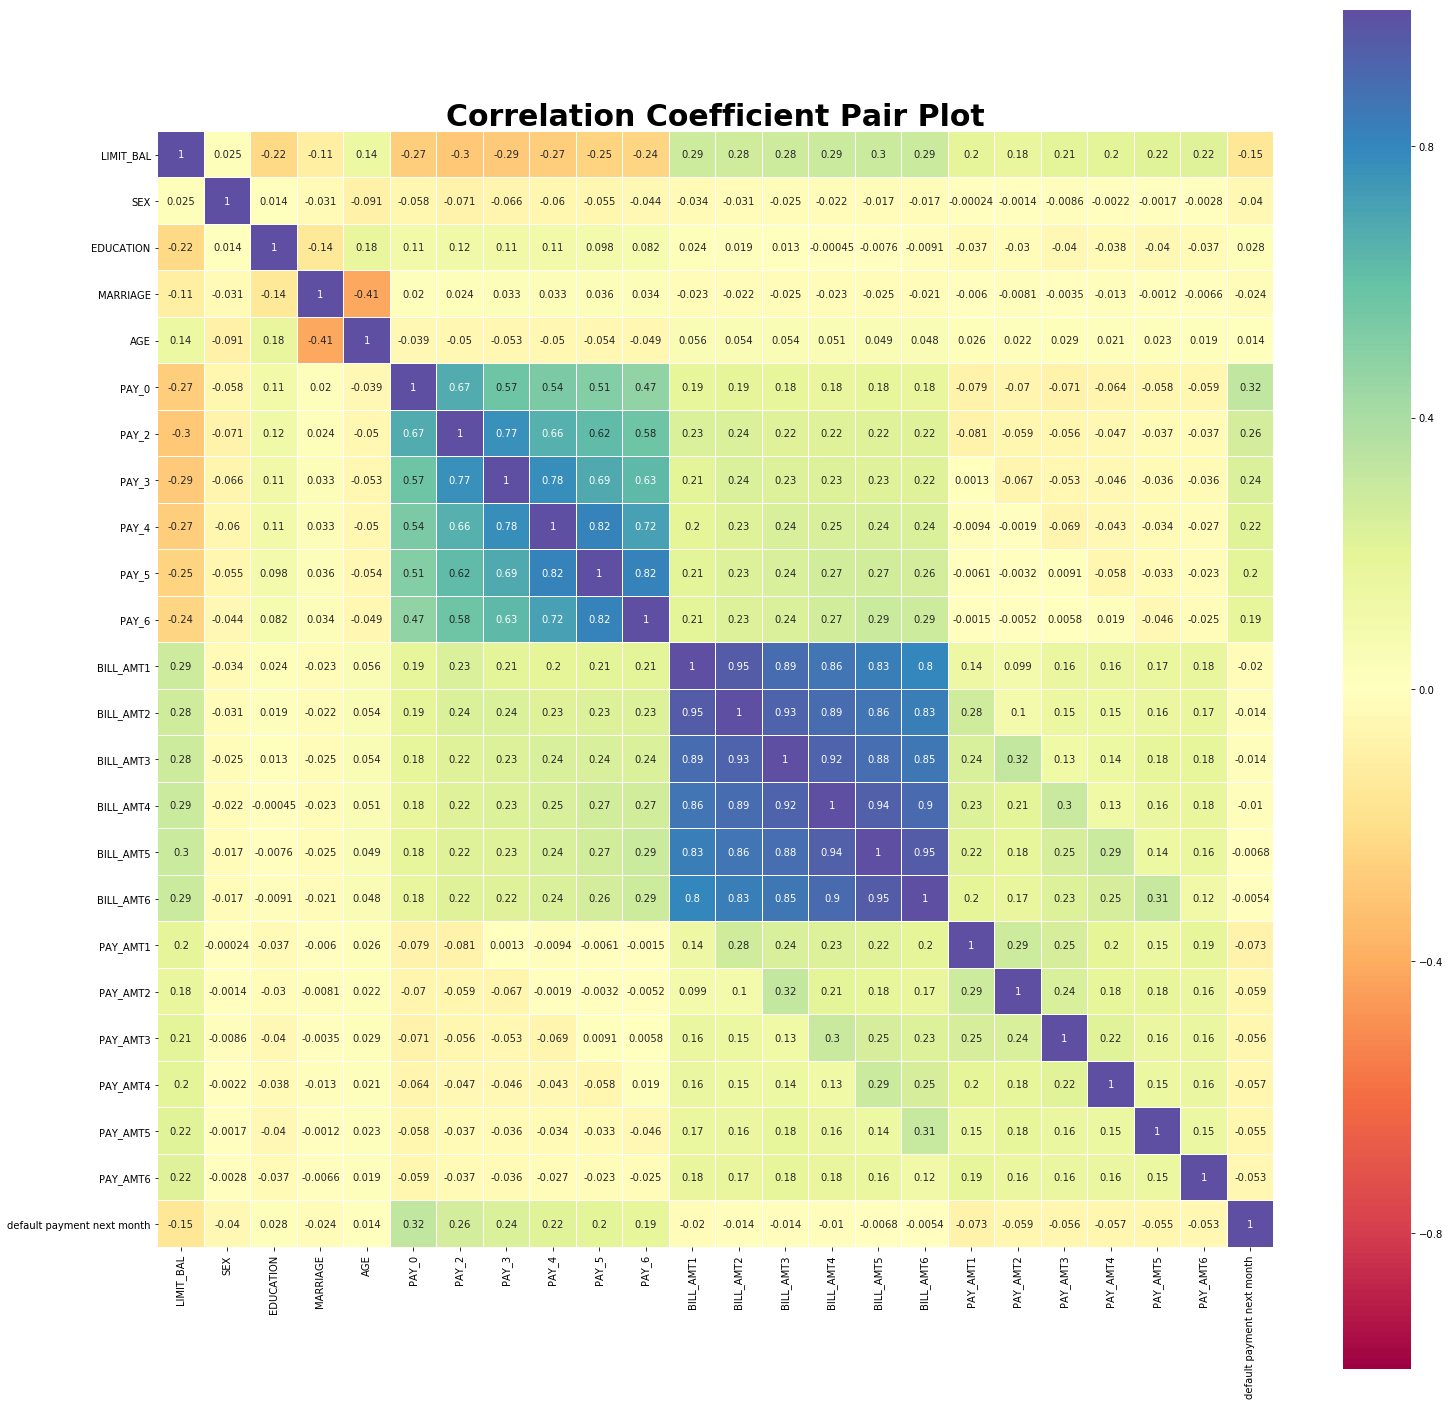

In [88]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = raw_data.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

predictors = raw_data.drop(['default payment next month'], axis=1).as_matrix()
target = to_categorical(raw_data['default payment next month']) 

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3)
X_train.shape, y_train.shape

((21000, 23), (21000, 2))

In [92]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [112]:
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
X_te_sc = sc.transform(X_test)

In [113]:
# Calculating default Ratio
non_default = len(y_train[y_train[:,0]==1])
default = len(y_train[y_train[:,1]==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.22295238095238096


In [114]:
n_cols = X_tr_sc.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_tr_sc, y_train, epochs=20, validation_split=0.3, callbacks = [early_stopping_monitor],class_weight=class_weight)

model.evaluate(X_te_sc, y_test)

Train on 14699 samples, validate on 6301 samples
Epoch 1/20
14699/14699 [==============================] - 3s - loss: 0.2377 - acc: 0.5956 - val_loss: 0.2142 - val_acc: 0.7318
Epoch 2/20
14699/14699 [==============================] - 2s - loss: 0.2179 - acc: 0.7064 - val_loss: 0.2107 - val_acc: 0.7937
Epoch 3/20
14699/14699 [==============================] - 2s - loss: 0.2150 - acc: 0.7422 - val_loss: 0.2083 - val_acc: 0.7989
Epoch 4/20
14699/14699 [==============================] - 2s - loss: 0.2126 - acc: 0.7567 - val_loss: 0.2064 - val_acc: 0.7892
Epoch 5/20
14699/14699 [==============================] - 2s - loss: 0.2096 - acc: 0.7701 - val_loss: 0.2069 - val_acc: 0.7908
Epoch 6/20
14699/14699 [==============================] - 2s - loss: 0.2088 - acc: 0.7680 - val_loss: 0.2072 - val_acc: 0.7927
Epoch 7/20
8608/9000 [===========================>..] - ETA: 0s

[0.56037171808878583, 0.79044444444444439]

In [117]:
X_tr_sc.shape, y_train.shape

((21000, 23), (21000, 2))

In [121]:
X = raw_data.drop(['default payment next month'], axis=1).as_matrix()
y = raw_data['default payment next month'].as_matrix()

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, y_train.shape

((21000, 23), (21000,))

In [125]:
# Calculating default Ratio
non_default = len(y_train[y_train==0])
default = len(y_train[y_train==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.22133333333333333


In [126]:
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
X_te_sc = sc.transform(X_test)

In [127]:
rfc = RandomForestClassifier(n_estimators=500,class_weight=class_weight)
rfc.fit(X_tr_sc, y_train)
rfc.score(X_tr_sc, y_train)

0.9996666666666667

In [128]:
rfc.score(X_te_sc, y_test)

0.81433333333333335

In [131]:
from sklearn.svm import SVC
svmc = SVC()
svmc.fit(X_tr_sc, y_train)
print(svmc.score(X_tr_sc, y_train),svmc.score(X_te_sc, y_test))

0.82780952381 0.815555555556


In [140]:
from sklearn.svm import SVC
svmc = SVC(C=10)
svmc.fit(X_tr_sc, y_train)
print(svmc.score(X_tr_sc, y_train),svmc.score(X_te_sc, y_test))

0.842952380952 0.815888888889


In [141]:
from sklearn.svm import SVC
svmc = SVC(C=10,gamma=1e-4)
svmc.fit(X_tr_sc, y_train)
print(svmc.score(X_tr_sc, y_train),svmc.score(X_te_sc, y_test))

0.810142857143 0.805888888889


In [142]:
from sklearn.svm import SVC
svmc = SVC(C=10,gamma=1e-5)
svmc.fit(X_tr_sc, y_train)
print(svmc.score(X_tr_sc, y_train),svmc.score(X_te_sc, y_test))

0.778666666667 0.779111111111


In [143]:
from sklearn.svm import SVC
svmc = SVC(C=100,gamma=1e-5)
svmc.fit(X_tr_sc, y_train)
print(svmc.score(X_tr_sc, y_train),svmc.score(X_te_sc, y_test))

0.810285714286 0.806222222222


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_tr_sc, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
  

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tuned_parameters = [{'n_estimators': [400,600,800], 'min_samples_leaf': [25,50,75],
                     'max_depth': [60,100,140]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(class_weight=class_weight), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_tr_sc, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_sc)
    print(classification_report(y_true, y_pred))
    print()
    print('acc:{}'.format(accuracy_score(y_true, y_pred)))

# Tuning hyper-parameters for precision



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/root/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-130-e70ec069113a>", line 16, in <module>
    clf.fit(X_tr_sc, y_train)
  File "/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py", line 638, in fit
    cv.split(X, y, groups)))
  File "/root/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "/root/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "/root/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/root/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends

KeyboardInterrupt: 

In [100]:
y_train.shape

(21000, 2)

In [102]:
y_train.ravel()

array([ 1.,  0.,  1., ...,  0.,  1.,  0.])

In [106]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
from itertools import cycle
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')


colors = cycle(['brown','lightcoral','red','magenta','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])


def algorithm(algoname,colors,train,test,pos):
    mean_tpr,lw,i =0.0, 2,1
    mean_fpr = np.linspace(0, 1, 100)
    fold_accuracy= []
    cnf_mat = 0
    skfold = StratifiedKFold(n_splits=10,shuffle = True)
    for (trainindex,testindex), color in zip(skfold.split(train, test.ravel()), colors):
        X_train, X_test = train[trainindex], train[testindex]
        y_train, y_test = test[trainindex], test[testindex]
        model = algoname.fit(X_train,y_train.ravel())
        fold_accuracy.append(model.score(X_test,y_test.ravel()))
        result = model.predict(X_test)
        fpr, tpr, thresholds= roc_curve(y_test,result,pos_label=pos)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        cm = confusion_matrix(y_test,result)
        cnf_mat +=  cm
        plt.step(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i+=1
    mean_tpr /= skfold.get_n_splits(train,test.ravel())
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.step(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
    plt.title("Average accuracy: {0:.3f}".format(np.asarray(fold_accuracy).mean()))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right") 
    plt.show()
    return("Average accuracy: {0:.3f} (+/-{1:.3f})".format(np.asarray(fold_accuracy).mean(),                                                            np.asarray(fold_accuracy).std()),           "\n Confustion Matrix:",cnf_mat)   



default = pd.read_excel('credit.xls',skiprows=1)

default_train,default_test = default.iloc[:,1:len(default.columns)-1],default.iloc[:,len(default.columns)-1]



X_train, X_test, y_train, y_test = train_test_split(default_train, default_test, test_size = 0.3)
print(X_train.shape, y_train.shape)
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_train)
X_te_sc = sc.transform(X_test)

print("\n Default of Credit Card Clients Data Set")
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
#print(algorithm(forest,colors,X_tr_sc,y_train,pos = None))



logistic = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
print(algorithm(logistic,colors,X_tr_sc,y_train,pos = None))



naive = GaussianNB()
print(algorithm(naive,colors,X_tr_sc,y_train,pos = None))



knneigh = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
           weights='uniform')
print(algorithm(knneigh,colors,X_tr_sc,y_train,pos = None))



svm = LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10,
     multi_class='ovr', penalty='l1', random_state=1000, tol=0.0001,
     verbose=0)
print(algorithm(svm,colors,X_tr_sc,y_train,pos = None))

(21000, 23) (21000,)

 Default of Credit Card Clients Data Set


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').